In [1]:
from sklearn import cross_validation, datasets, linear_model, metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

D:\3kurs1sem\IDEs\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
blobs = datasets.make_blobs(300,centers=2,cluster_std=6,random_state=1)

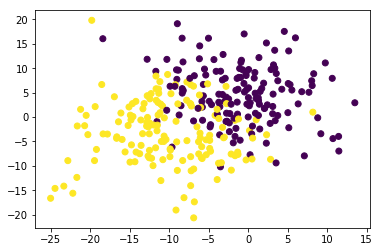

In [3]:
plt.scatter(blobs[0][:,0],blobs[0][:,1],c=blobs[1])

In [4]:
train_data,test_data,train_labels,test_labels = cross_validation.train_test_split(blobs[0],blobs[1],test_size=0.1,random_state=1)

In [5]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data,train_labels)
metrics.roc_auc_score(test_labels,ridge_model.predict(test_data))

0.8392857142857143

In [6]:
sgd_model = linear_model.SGDClassifier(random_state=0)
sgd_model.fit(train_data,train_labels)
metrics.roc_auc_score(test_labels,sgd_model.predict(test_data))

D:\3kurs1sem\IDEs\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8392857142857143

In [7]:
sgd_auc_scores = cross_validation.cross_val_score(linear_model.SGDClassifier(),blobs[0],blobs[1],scoring='roc_auc',cv=20)

D:\3kurs1sem\IDEs\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\3kurs1sem\IDEs\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\3kurs1sem\IDEs\lib\site-packages\sklearn\li

In [8]:
ridge_auc_scores = cross_validation.cross_val_score(linear_model.RidgeClassifier(),blobs[0],blobs[1],scoring='roc_auc',cv=20)

In [9]:
sgd_auc_scores.mean()

0.9204719387755101

In [10]:
ridge_auc_scores.mean()

0.9479910714285713

In [11]:
sgd_auc_scores.std(ddof=1)

0.09624172805330489

In [12]:
ridge_auc_scores.std(ddof=1)

0.05365806084995355

In [13]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [14]:
sgd_mean = sgd_auc_scores.mean()

In [15]:
ridge_mean = ridge_auc_scores.mean()

In [16]:
print(_zconfint_generic(sgd_mean,np.sqrt(0.25/len(sgd_auc_scores)),0.05,'two-sided'))

(0.7013413036313647, 1.1396025739196556)


In [17]:
print(_zconfint_generic(ridge_mean,np.sqrt(0.25/len(ridge_auc_scores)),0.05,'two-sided'))

(0.728860436284426, 1.1671217065727166)
